<a href="https://colab.research.google.com/github/NithyaConnect/ds-phython/blob/main/clean_ads_k_means_clustering4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering with clean ads data






In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
path="/content/drive/MyDrive/clusterring glearn/Addata.xlsx" 
df_test=pd.read_excel(path)
df=df_test

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
df.hist(bins=25, figsize=(20,20), layout=(-1, 5), edgecolor="black")
plt.tight_layout();


In [ ]:
df.shape

In [ ]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())




,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
71,2020-10-29-18,Format1,300,250,75000,Inter217,Web,Desktop,Display,1335,311,311,1,0.0,0.35,0.0,NaN,NaN,NaN
72,2020-10-30-6,Format1,300,250,75000,inter230,Video,Mobile,Video,857,124,124,1,0.0,0.35,0.0,NaN,NaN,NaN
73,2020-10-28-21,Format1,300,250,75000,Inter217,Web,Desktop,Display,1789,306,300,1,0.0,0.35,0.0,NaN,NaN,NaN
74,2020-10-28-19,Format1,300,250,75000,Inter224,Web,Desktop,Video,1784,274,274,1,0.0,0.35,0.0,NaN,NaN,NaN
75,2020-11-6-22,Format1,300,250,75000,Inter229,Video,Desktop,Display,2095,379,375,1,0.0,0.35,0.0,NaN,NaN,NaN


In [ ]:
df=df.dropna()


In [ ]:
df.shape


In [ ]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())




,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC


In [ ]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"seem to have {n_duplicates} duplicates in database.")


seem to have 0 duplicates in database.


In [ ]:
def calculate_cPM(x):
    CPM=(df.Spend/df.Impressions)*1000
    return CPM

In [ ]:
df['CPM']= df[['CPM']].apply(lambda x:calculate_cPM(x))

<ipython-input-46-c2b47c2a5cb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPM']= df[['CPM']].apply(lambda x:calculate_cPM(x))


In [ ]:
def calculate_cPC(x):
    CPC=(df.Spend/df.Clicks)
    return CPC

In [ ]:
df['CPC']= df[['CPC']].apply(lambda x:calculate_cPC(x))

<ipython-input-48-9568f225bfe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPC']= df[['CPC']].apply(lambda x:calculate_cPC(x))


In [ ]:
def calculate_cTR(x):
    CTR=(df.Clicks/df.Impressions*100)
    return CTR

In [ ]:
df['CTR']= df[['CTR']].apply(lambda x:calculate_cTR(x))


<ipython-input-50-d358f7b85e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTR']= df[['CTR']].apply(lambda x:calculate_cTR(x))


In [ ]:
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.000000,0.000000
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.000000,0.000000
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.000000,0.000000
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.000000,0.000000
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,2020-11-2-6,Format6,336,250,84000,Inter229,Video,Desktop,Video,80771,45701,39115,5346,481.59,0.35,313.0335,13.667391,12.312156,0.090084
18355,2020-11-1-19,Format5,720,300,216000,Inter227,App,Mobile,Display,505442,196734,169895,25169,1491.26,0.35,969.3190,14.814444,8.777539,0.059250
18356,2020-11-2-13,Format6,336,250,84000,Inter228,Video,Mobile,Display,169677,99969,84664,15807,794.39,0.35,516.3535,18.670273,9.382855,0.050256
18357,2020-11-2-12,Format1,300,250,75000,Inter221,App,Mobile,Display,3955744,2028909,2002900,5062,3586.57,0.33,2403.0019,0.252734,1.790689,0.708528


In [ ]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [ ]:
df_number = df.select_dtypes(include=[np.number])
df_number

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.000000,0.000000
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.000000,0.000000
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.000000,0.000000
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.000000,0.000000
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,336,250,84000,80771,45701,39115,5346,481.59,0.35,313.0335,13.667391,12.312156,0.090084
18355,720,300,216000,505442,196734,169895,25169,1491.26,0.35,969.3190,14.814444,8.777539,0.059250
18356,336,250,84000,169677,99969,84664,15807,794.39,0.35,516.3535,18.670273,9.382855,0.050256
18357,300,250,75000,3955744,2028909,2002900,5062,3586.57,0.33,2403.0019,0.252734,1.790689,0.708528


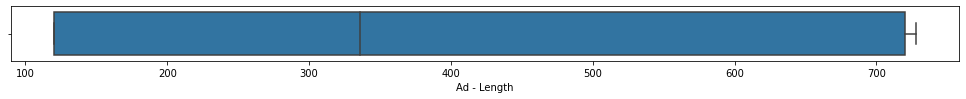

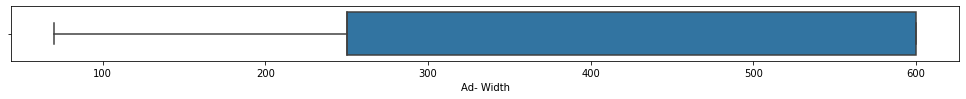

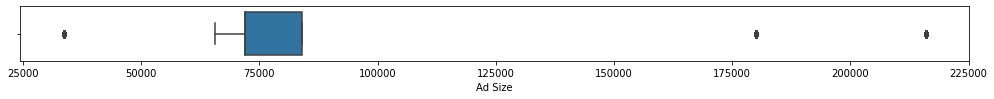

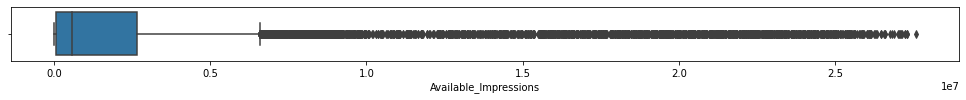

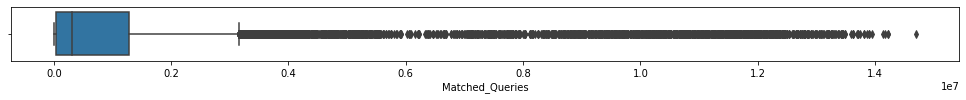

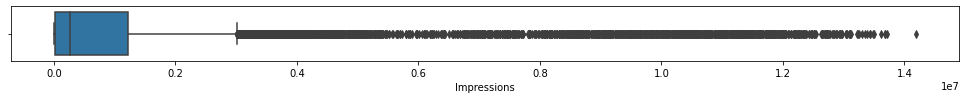

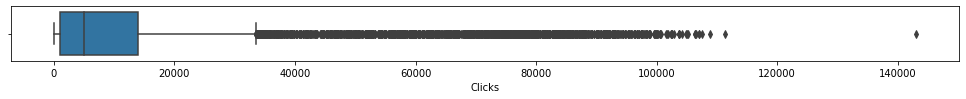

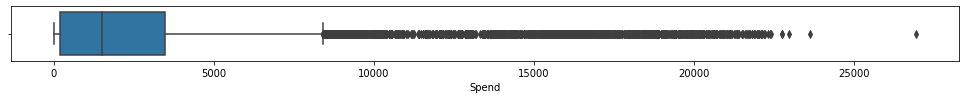

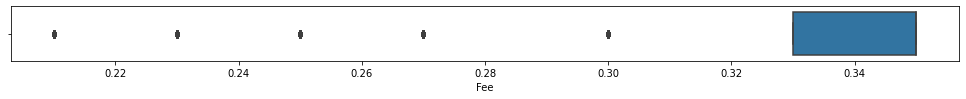

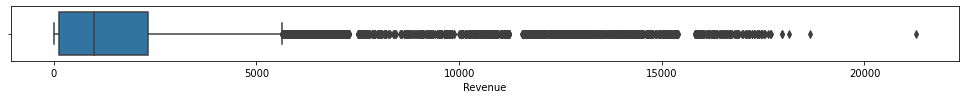

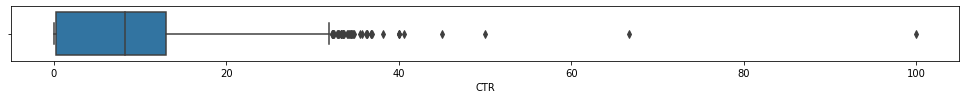

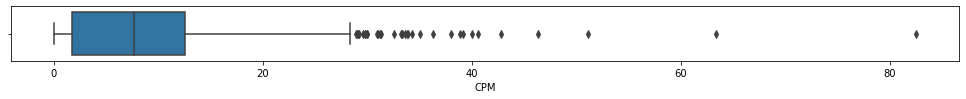

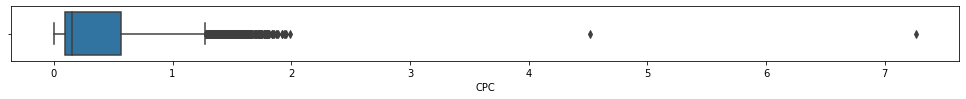

In [ ]:
for column in df_number:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_number, x=column)

In [ ]:
df_number.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,18330.000000,18330.000000,18330.000000,1.833000e+04,1.833000e+04,1.833000e+04,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000
mean,386.297872,329.102019,95074.926350,2.581882e+06,1.380052e+06,1.323141e+06,11342.414184,2864.110546,0.334266,2035.679009,7.366038,7.672195,0.351092
std,227.660490,201.640473,60172.281693,4.843240e+06,2.573899e+06,2.488874e+06,17733.244400,4119.887922,0.032617,3149.310187,7.515998,6.482599,0.343360
min,120.000000,70.000000,33600.000000,4.000000e+00,3.000000e+00,2.000000e+00,1.000000,0.000000,0.210000,0.000000,0.010874,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,5.947250e+04,3.022800e+04,1.991000e+04,944.000000,194.275000,0.330000,126.280000,0.258301,1.711970,0.092706
50%,336.000000,250.000000,72000.000000,5.696205e+05,3.044060e+05,2.723450e+05,5023.500000,1519.435000,0.350000,987.635000,8.257612,7.656059,0.155227
75%,720.000000,600.000000,84000.000000,2.670538e+06,1.278065e+06,1.217148e+06,13967.000000,3476.625000,0.350000,2329.340000,13.001101,12.516143,0.566712
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,100.000000,82.500000,7.264000


<AxesSubplot:>

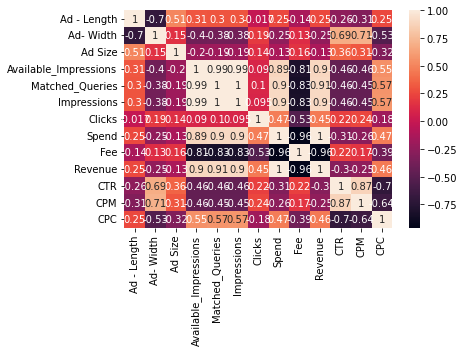

In [ ]:
sns.heatmap(df.corr(),annot=True)

Categorical variables or not considered for clusterring
Based on the heat map,highly corelated variables are avoided for clustering
So the selected variables are  ["Ad - Length","Ad- Width",'Impressions','Clicks','Spend',"Revenue"]


In [ ]:
selected_columns = ["Ad - Length","Ad- Width",'Impressions','Clicks','Spend',"Revenue"]


In [ ]:
cluster_data=df.loc[:,selected_columns]
X=cluster_data
X

,Ad - Length,Ad- Width,Impressions,Clicks,Spend,Revenue
0,300,250,323,1,0.00,0.0000
1,300,250,285,1,0.00,0.0000
2,300,250,355,1,0.00,0.0000
3,300,250,495,1,0.00,0.0000
4,300,250,242,1,0.00,0.0000
...,...,...,...,...,...,...
18354,336,250,39115,5346,481.59,313.0335
18355,720,300,169895,25169,1491.26,969.3190
18356,336,250,84664,15807,794.39,516.3535
18357,300,250,2002900,5062,3586.57,2403.0019


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
data_scaled.head()
Y=data_scaled #for kmeans
Z=data_scaled #for hierachical
Y.describe()

,Ad - Length,Ad- Width,Impressions,Clicks,Spend,Revenue
count,1.833000e+04,1.833000e+04,1.833000e+04,18330.000000,18330.000000,18330.000000
mean,-1.674602e-16,-9.923565e-17,-4.961782e-17,0.000000,0.000000,0.000000
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027,1.000027,1.000027
min,-1.169747e+00,-1.285005e+00,-5.316360e-01,-0.639574,-0.695210,-0.646406
25%,-1.169747e+00,-3.923031e-01,-5.236370e-01,-0.586396,-0.648054,-0.606308
50%,-2.209397e-01,-3.923031e-01,-4.222089e-01,-0.356341,-0.326395,-0.332794
75%,1.465828e+00,1.343507e+00,-4.258774e-02,0.148008,0.148677,0.093249
max,1.500969e+00,1.343507e+00,5.171809e+00,7.427303,5.842007,6.109600


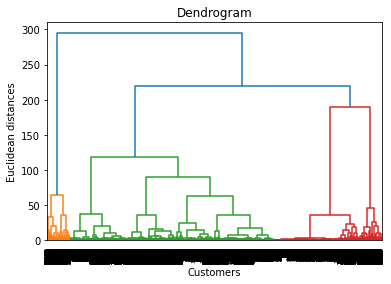

In [ ]:
# Using the dendrogram to find the optimal numbers of clusters. 

import scipy.cluster.hierarchy as sch

#Lets create a dendrogram variable 
# linkage is actually the algorithm itself of hierarchical clustering and then in 
#linkage we have to specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(Z, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

(longest vertical distance we can without crossing any horizontal lines,)  For this dataset, the optimum cluster number will be 2.

K Means clustering


In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [ ]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(Y)
    wss.append(KM.inertia_)
    labels = KM.predict(Y)
wss


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[109979.99999999983,
 65981.41012216572,
 41620.952255480326,
 23580.4304490616,
 16458.8694002062,
 12146.430463195797,
 10103.266770919254,
 8580.687652398654,
 7536.862065900819,
 6838.98397034357]

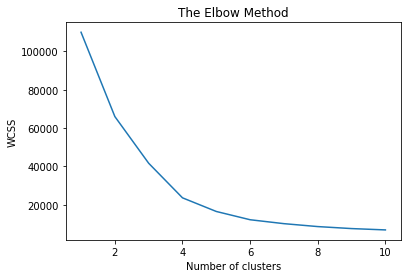

In [ ]:
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 
# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2,10):
    kmeans_s=KMeans(n_clusters=k, random_state=1).fit(Y)
    labels_s= kmeans_s.predict(Y)
    sc[k] = silhouette_score(Y, labels_s)
    print("sil s",sc[k] )

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.6407396635025561


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.5045358075645855


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.556790436168561


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.5700917249084635


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.5986260152891725


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.6195730116271617


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.6197793126957037


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


sil s 0.6154181840038444


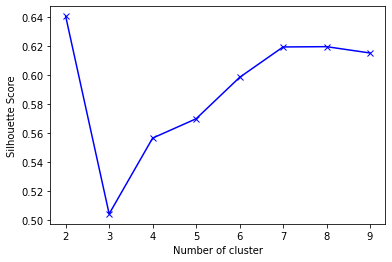

In [ ]:
#Shree plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

Observations:

We can see from the plot that silhouette score is highest for k=2. Well that makes it slightly easy for us and we can start with first understanding these 5 clusters. So let's take the number of clusters as 2
*   List item



In [ ]:
k_means2 = KMeans(n_clusters = 2,random_state=1,max_iter=300)
k_means2.fit(Y)
labels2 = k_means2.labels_
silhouette_score(Y,labels2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6407396635025561

In [ ]:
df["cluster"]=labels2


<ipython-input-68-c2edc7f00430>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"]=labels2


In [ ]:
df["cluster"].value_counts()

0    17129
1     1201
Name: cluster, dtype: int64

In [ ]:
df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster
18349,2020-10-28-16,Format2,728,90,65520,Inter222,Video,Desktop,Video,24320191,13284700,12844237,21181,26931.87,0.21,21276.1800,0.164907,2.096806,1.271511,1
18350,2020-11-2-2,Format6,336,250,84000,Inter225,Video,Mobile,Video,91712,54413,46813,5753,526.03,0.35,341.9195,12.289321,11.236836,0.091436,0
18351,2020-11-2-15,Format6,336,250,84000,Inter226,Web,Mobile,Display,470903,205044,177536,26651,1410.00,0.35,916.5000,15.011603,7.942051,0.052906,0
18352,2020-11-2-4,Format4,120,600,72000,inter230,Video,Mobile,Video,11655,7719,6537,1138,91.36,0.35,59.3840,17.408597,13.975830,0.080281,0
18353,2020-11-2-2,Format6,336,250,84000,Inter227,App,Mobile,Video,1057346,587204,576016,1176,863.35,0.35,561.1775,0.204161,1.498830,0.734141,0
18354,2020-11-2-6,Format6,336,250,84000,Inter229,Video,Desktop,Video,80771,45701,39115,5346,481.59,0.35,313.0335,13.667391,12.312156,0.090084,0
18355,2020-11-1-19,Format5,720,300,216000,Inter227,App,Mobile,Display,505442,196734,169895,25169,1491.26,0.35,969.3190,14.814444,8.777539,0.059250,0
18356,2020-11-2-13,Format6,336,250,84000,Inter228,Video,Mobile,Display,169677,99969,84664,15807,794.39,0.35,516.3535,18.670273,9.382855,0.050256,0
18357,2020-11-2-12,Format1,300,250,75000,Inter221,App,Mobile,Display,3955744,2028909,2002900,5062,3586.57,0.33,2403.0019,0.252734,1.790689,0.708528,0
18358,2020-11-2-0,Format6,336,250,84000,Inter224,Web,Desktop,Display,2503645,1054558,989967,4139,1777.90,0.35,1155.6350,0.418095,1.795918,0.429548,0


In [ ]:
#Calculating mean and median of the original data for each label
mean = df.groupby('cluster').mean()
median = df.groupby('cluster').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans.T


,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
Ad - Length,3.657979e+02,6.786744e+02,300.000000,7.280000e+02
Ad- Width,3.437895e+02,1.196253e+02,300.000000,9.000000e+01
Ad Size,9.679694e+04,7.051504e+04,72000.000000,6.552000e+04
Available_Impressions,1.456732e+06,1.862908e+07,480484.000000,1.919208e+07
Matched_Queries,7.800188e+05,9.937889e+06,255051.000000,1.032989e+07
Impressions,7.448146e+05,9.571397e+06,223133.000000,9.949968e+06
Clicks,1.085468e+04,1.829862e+04,4425.000000,1.916500e+04
Spend,1.950655e+03,1.589208e+04,1407.120000,1.618905e+04
Fee,3.410882e-01,2.369609e-01,0.350000,2.300000e-01
Revenue,1.324680e+03,1.217615e+04,914.630000,1.246557e+04


licks, spend, revenue, CPM, CTR, & CPC based on Device Type. 

<AxesSubplot:xlabel='cluster,Device Type'>

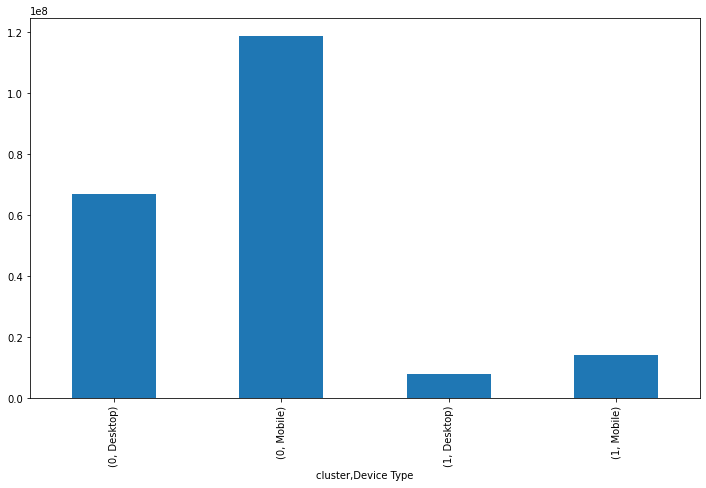

In [ ]:
df.groupby(['cluster','Device Type']).sum()['Clicks'].plot(kind='bar',figsize=(12,7))


<AxesSubplot:xlabel='cluster,Device Type'>

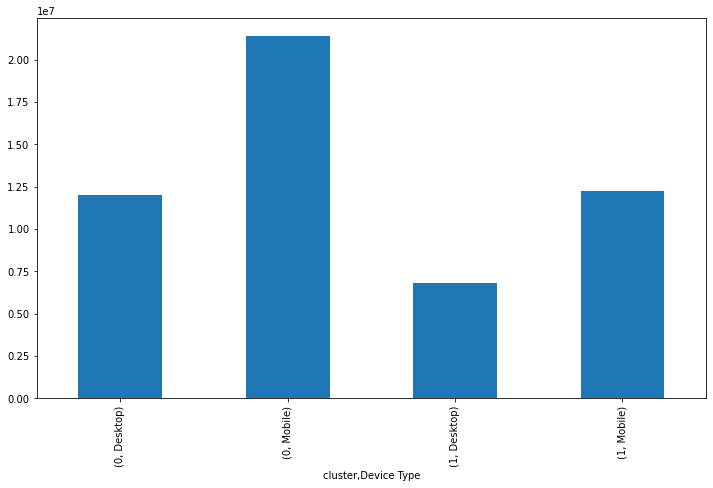

In [ ]:
df.groupby(['cluster','Device Type']).sum()['Spend'].plot(kind='bar',figsize=(12,7))


<AxesSubplot:xlabel='cluster,Device Type'>

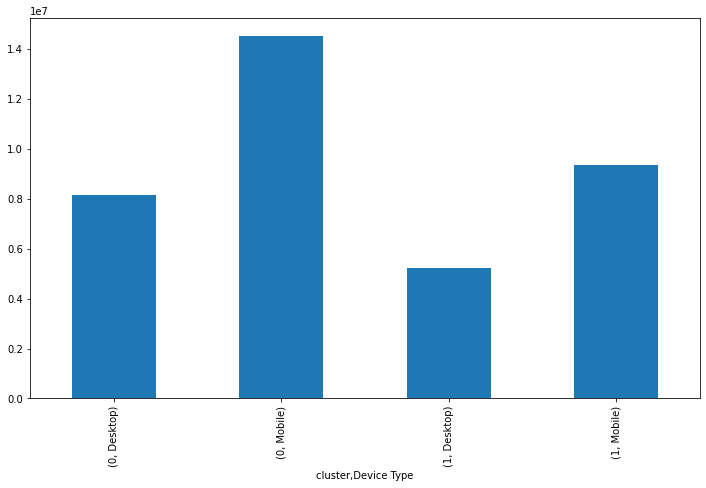

In [ ]:
df.groupby(['cluster','Device Type']).sum()['Revenue'].plot(kind='bar',figsize=(12,7))


<AxesSubplot:xlabel='cluster,Device Type'>

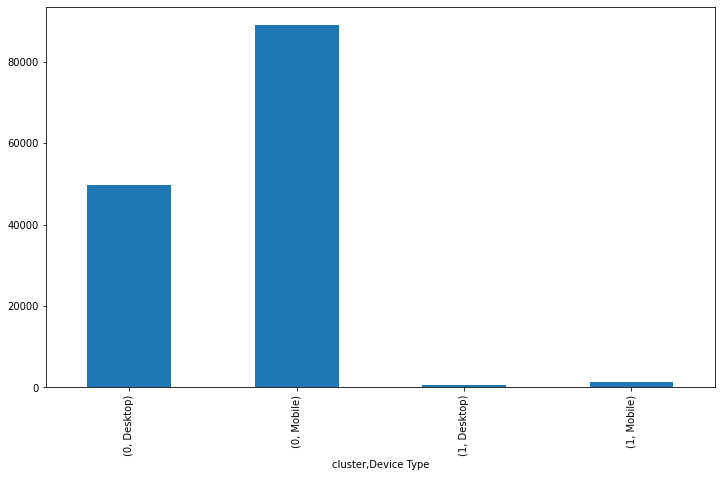

In [ ]:
df.groupby(['cluster','Device Type']).sum()['CPM'].plot(kind='bar',figsize=(12,7))


<AxesSubplot:xlabel='cluster,Device Type'>

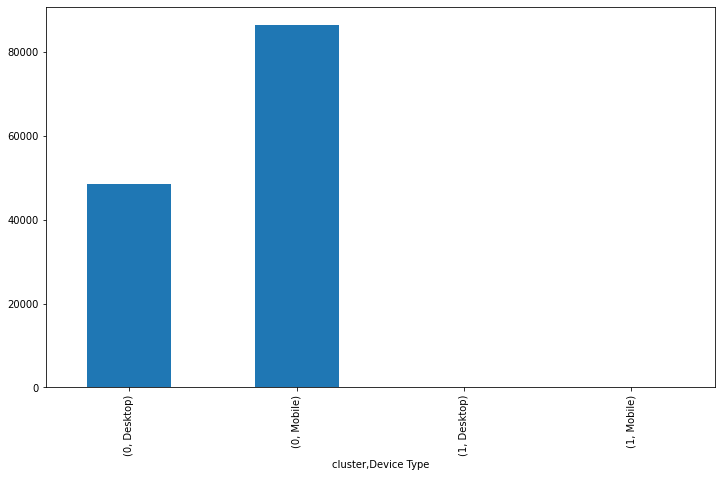

In [ ]:
df.groupby(['cluster','Device Type']).sum()['CTR'].plot(kind='bar',figsize=(12,7))


<AxesSubplot:xlabel='cluster,Device Type'>

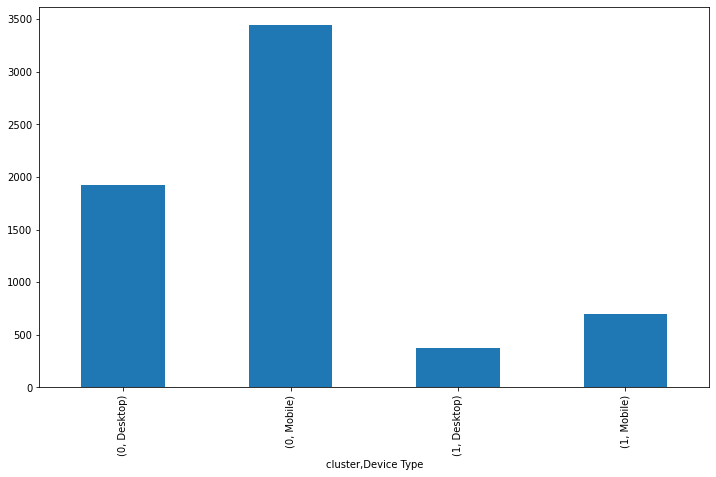

In [ ]:
df.groupby(['cluster','Device Type']).sum()['CPC'].plot(kind='bar',figsize=(12,7))


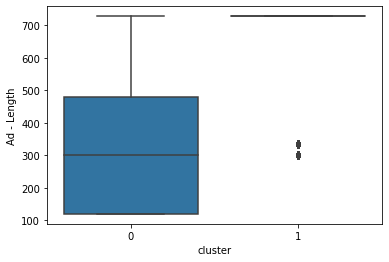

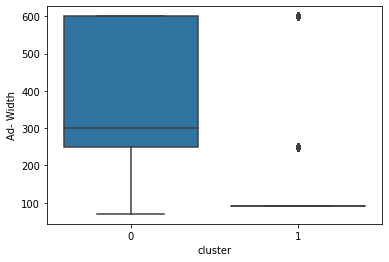

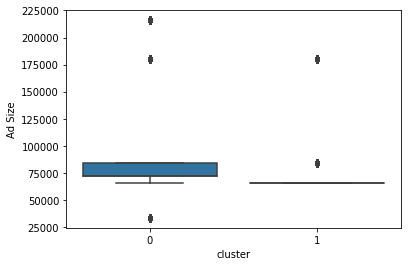

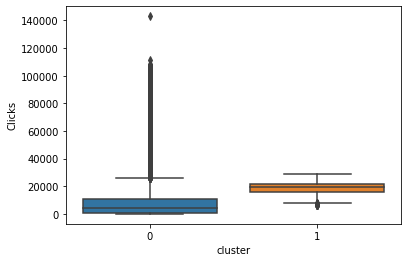

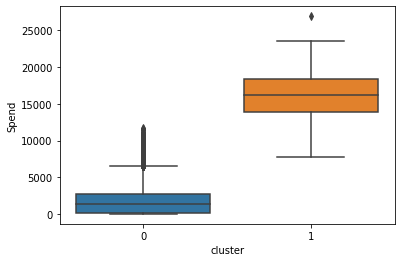

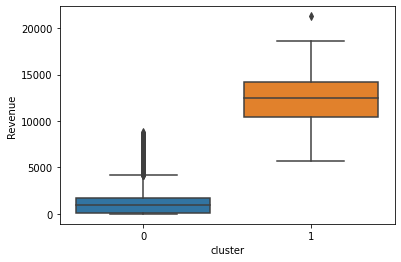

In [ ]:
cols_visualise = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Clicks', 'Spend','Revenue']

for col in cols_visualise:
    sns.boxplot(x ='cluster', y = col, data = df)
    plt.show()

In [ ]:
centroids  = k_means2.cluster_centers_  
centroids

array([[-0.09014165,  0.07291532, -0.23245088, -0.02748906, -0.22182223,
        -0.22586461],
       [ 1.28448102, -1.03901298,  3.31232832,  0.39170772,  3.16087444,
         3.21847668]])

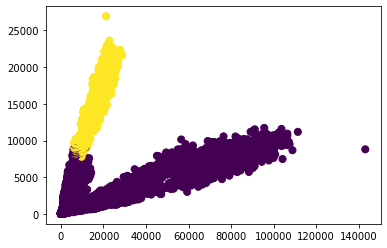

In [ ]:
plt.scatter(df_number['Clicks'],df_number['Spend'], c=df['cluster'], s=50, cmap='viridis')


KeyError: ignored

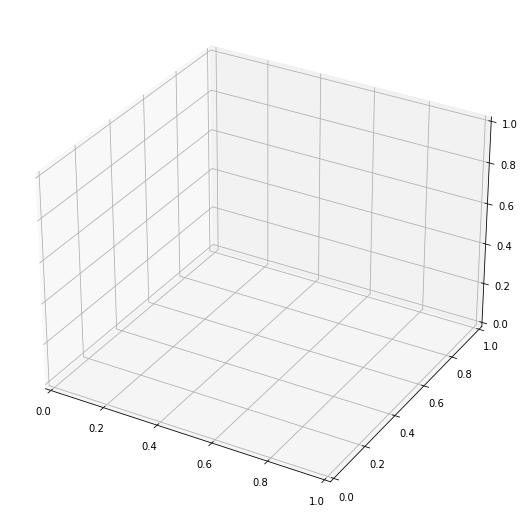

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(["Fresh"],df["Milk"],df["Grocery"],c=df['cluster'].astype('category'),cmap = "viridis",edgecolor="k", s=150)
ax1.view_init(20, -50)
ax1.set_xlabel("Fresh", fontsize=20)
ax1.set_ylabel("Milk", fontsize=20)
ax1.set_zlabel("Grocery", fontsize=20)
ax1.set_title("K-Means Clusters for wholesale data", fontsize=12)


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(Y,labels)


silhouette score is non negative closer to 1 ,so effective number of  cluster